# EDAを行う
- 登録者とviewCountに相関はあるのかどうか

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [34]:
path2data = "/Users/y.kotani/Downloads/30分以内に投稿された動画データ.xlsx"
youtube_view_count_df = pd.read_excel(path2data, sheet_name="Sheet1")

print(f"Number of rows: {youtube_view_count_df.shape[0]}")

Number of rows: 7450


# 前処理

In [35]:
# convert publisedAt(UTC) to JST
youtube_view_count_df["publishedAt(UTC)"] = pd.to_datetime(youtube_view_count_df["publishedAt"])
youtube_view_count_df["publishedAt(JST)"] = youtube_view_count_df["publishedAt(UTC)"] + pd.Timedelta(hours=9)
youtube_view_count_df["extractedDate"] = pd.to_datetime(youtube_view_count_df["extractedDate"], utc=True)

# 投稿時間と抽出時間の差分を計算
youtube_view_count_df["minuteDiff"] = (youtube_view_count_df["extractedDate"] - youtube_view_count_df["publishedAt(JST)"]).dt.total_seconds()/60

# 投稿時間のday of week, hourを計算
youtube_view_count_df["dayOfWeek"] = youtube_view_count_df["publishedAt(JST)"].dt.day_name()
youtube_view_count_df["hour"] = youtube_view_count_df["publishedAt(JST)"].dt.hour

# hourをsin, cosに変換
youtube_view_count_df["sin_hour"] = np.sin(2*np.pi*youtube_view_count_df["hour"]/24)
youtube_view_count_df["cos_hour"] = np.cos(2*np.pi*youtube_view_count_df["hour"]/24)

# dayOfWeekをone-hotに変換
youtube_view_count_df = pd.get_dummies(youtube_view_count_df, columns=["dayOfWeek"], dtype=float)

# durationを分に変換 ISO8601形式のdurationを分に変換
youtube_view_count_df["duration"] = youtube_view_count_df["duration"].apply(lambda x: pd.Timedelta(x).total_seconds()/60)

# 欠損値の処理
youtube_view_count_df = youtube_view_count_df.dropna(subset=["extractedDate", "commentCount", "likeCount", "viewCount"])

In [36]:
youtube_view_count_df.isnull().sum()

channelName                  0
channelCountry             709
channelDefaultLanguage    5185
subscriberCount              0
videoCount                   0
channelTopicIds            555
channeltopicCategories     555
publishedAt                  0
channelId                    0
title                        0
description                470
thumbnailURL                 0
channelTitle                 0
tags                      1338
categoryId                   0
defaultLanguage           3715
duration                     0
viewCount                    0
favoriteCount                0
commentCount                 0
likeCount                    0
videoId                      0
extractedDate                0
publishedAt(UTC)             0
publishedAt(JST)             0
minuteDiff                   0
hour                         0
sin_hour                     0
cos_hour                     0
dayOfWeek_Friday             0
dayOfWeek_Monday             0
dayOfWeek_Saturday           0
dayOfWee

In [37]:
youtube_view_count_df.head()

,channelName,channelCountry,channelDefaultLanguage,subscriberCount,videoCount,channelTopicIds,channeltopicCategories,publishedAt,channelId,title,...,hour,sin_hour,cos_hour,dayOfWeek_Friday,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday
1494,ARY News,PK,NaN,12600000,99861,NaN,NaN,2023-11-25T08:15:08Z,UC35TRecEk9N5FAj2a--PAkg,【ボートレースライブ】三国SG 第26回チャレンジカップ/G2レディースCC 5日目 1〜12R,...,17,-0.965926,-0.258819,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1495,NEWS9 Live,IN,NaN,649000,35994,"/m/098wr, /m/05qt0","https://en.wikipedia.org/wiki/Society, https:/...",2023-11-25T08:12:11Z,UCJAPqcMNYk3HMknRuPMNvKA,飯塚オートレース中継 2023年11月25日 チャリロト杯GⅠ開設67周年記念レース 4日目,...,17,-0.965926,-0.258819,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1496,FDOR,GB,NaN,734000,120,"/m/02vx4, /m/02vxn, /m/02jjt, /m/06ntj",https://en.wikipedia.org/wiki/Association_foot...,2023-11-25T08:20:22Z,UC65i3Fyq91uiUkIS0i5GLNQ,أبو حمزة: أي خرق للهدنة سيقابل بالرد المناسب,...,17,-0.965926,-0.258819,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1497,The Gooner Talk,GB,NaN,52600,2062,"/m/02vx4, /m/06ntj",https://en.wikipedia.org/wiki/Association_foot...,2023-11-25T08:15:04Z,UC5kU-yl9-AweunnZ40619Pw,Why Neymar and Mbappe HATE each other,...,17,-0.965926,-0.258819,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1498,WION,IN,NaN,8220000,124996,NaN,NaN,2023-11-25T08:20:02Z,UCgcUFVynuKwaIZLJkjhzOVg,"CHICKEN TIKKA BIRYANI, SPICY CHICKEN KALEJI BH...",...,17,-0.965926,-0.258819,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
youtube_view_count_df.isnull().sum()

channelName                  0
channelCountry             709
channelDefaultLanguage    5185
subscriberCount              0
videoCount                   0
channelTopicIds            555
channeltopicCategories     555
publishedAt                  0
channelId                    0
title                        0
description                470
thumbnailURL                 0
channelTitle                 0
tags                      1338
categoryId                   0
defaultLanguage           3715
duration                     0
viewCount                    0
favoriteCount                0
commentCount                 0
likeCount                    0
videoId                      0
extractedDate                0
publishedAt(UTC)             0
publishedAt(JST)             0
minuteDiff                   0
hour                         0
sin_hour                     0
cos_hour                     0
dayOfWeek_Friday             0
dayOfWeek_Monday             0
dayOfWeek_Saturday           0
dayOfWee

# 日本のみ抽出

In [39]:
youtube_view_count_df = youtube_view_count_df[youtube_view_count_df["channelCountry"] == "JP"]

In [40]:
# 動画titleのembeddingを計算
# youtube_view_count_df['title'].values

# 可視化

# 100万超えの動画を見る

In [41]:
youtube_view_count_df.loc[youtube_view_count_df["viewCount"] > 100000][["channelName", "title", "viewCount"]]

,channelName,title,viewCount
1541,Roboco Ch. - ロボ子,One minute shopping challenge with Family,146299.0
1589,東日本実業団陸上競技連盟,【ライブ配信】2023八王子ロングディスタンス11月25日（土）,112229.0
1629,ボンソワールTV BonSoirTV,【マリころオフコラボ3D】超おどるメイドインワリオ【ホロライブ/宝鐘マリン】,100646.0
1725,ほびーめーかー【公式】パチンコパチスロガチ実践動画,【桃鉄ワールド】100年耐久🔥VS最強CPU(さくま×2)～25年目から12時間↑耐久～ #...,316642.0
2431,一般社団法人日本マスターズ水泳協会,SG第26回チャレンジカップ/GII第10回レディースチャレンジカップ／最終日・優勝戦《マリ...,129778.0
2569,小倉競輪公式チャンネル,World Championship Finals - Day 3 | Clash of C...,593543.0
2570,けいすけ実況局,【ザンギエフ】頑張りますわ！！！ #UKDWIN【ストリートファイター6ですわ】#KZHCU...,240584.0
2572,sagakeiba official,🔴BIG BREAKING IPL 2024: HARDIK PANDYA RETAINED...,233489.0
2573,胡桃のあ,Big Breaking : Hardik Pandya To Stay in Gujara...,155492.0
3171,あまみちゃんねる,Santo Rosário da Madrugada 27/11 - Instituto H...,132551.0


## 投稿後経過した時間とviewの相関

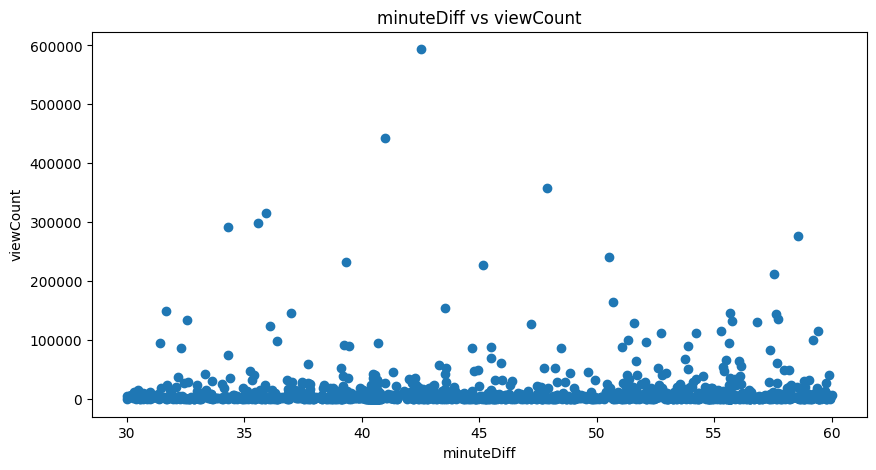

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(youtube_view_count_df["minuteDiff"], youtube_view_count_df["viewCount"], "o")
ax.set_xlabel("minuteDiff")
ax.set_ylabel("viewCount")
ax.set_title("minuteDiff vs viewCount")
# ax.set_ylim(0, 10000)
plt.show()

In [43]:
# 投稿したhourごとに分布の変化があるのか見る using plotly scatter plot
import plotly.graph_objects as go

fig = go.Figure()
hour_list = list(map(str, youtube_view_count_df["hour"].unique()))
for hour in hour_list:
    df = youtube_view_count_df[youtube_view_count_df["hour"] == int(hour)]
    fig.add_trace(go.Scatter(x=df["minuteDiff"], y=df["viewCount"], mode="markers", name=hour))
fig.update_layout(title="minuteDiff vs viewCount", xaxis_title="minuteDiff", yaxis_title="viewCount")
fig.show()

In [44]:
youtube_view_count_df.columns

Index(['channelName', 'channelCountry', 'channelDefaultLanguage',
       'subscriberCount', 'videoCount', 'channelTopicIds',
       'channeltopicCategories', 'publishedAt', 'channelId', 'title',
       'description', 'thumbnailURL', 'channelTitle', 'tags', 'categoryId',
       'defaultLanguage', 'duration', 'viewCount', 'favoriteCount',
       'commentCount', 'likeCount', 'videoId', 'extractedDate',
       'publishedAt(UTC)', 'publishedAt(JST)', 'minuteDiff', 'hour',
       'sin_hour', 'cos_hour', 'dayOfWeek_Friday', 'dayOfWeek_Monday',
       'dayOfWeek_Saturday', 'dayOfWeek_Sunday', 'dayOfWeek_Thursday',
       'dayOfWeek_Tuesday', 'dayOfWeek_Wednesday'],
      dtype='object')

# モデル作成

In [45]:
print(len(youtube_view_count_df))

1526


In [46]:
# カラムの定義
hour_cols = ["sin_hour", "cos_hour"]
dayOfWeek_cols = list(filter(lambda x: x.startswith("dayOfWeek"), youtube_view_count_df.columns))

features = ["minuteDiff", *hour_cols, *dayOfWeek_cols, "commentCount", "likeCount", "favoriteCount", "duration", "subscriberCount"]
target = "viewCount"

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import mlflow
from mlflow.models import infer_signature
from mlflow.data.pandas_dataset import PandasDataset

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
with mlflow.start_run():
    X = youtube_view_count_df[features]
    y = youtube_view_count_df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf_params = {
        "n_estimators": 100,
        "random_state": 42,
    }
    rf = RandomForestRegressor(**rf_params)

    scoring = {
        "r2": "r2",
        "mse": "neg_mean_squared_error",
        "mae": "neg_mean_absolute_error",
    }
    scores = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring)
    scores_mean = {f"cv_{k}": np.mean(v) for k, v in scores.items()}

    rf = RandomForestRegressor(**rf_params)
    rf.fit(X_train, y_train)

    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    dataset: PandasDataset = mlflow.data.from_pandas(youtube_view_count_df)
    mlflow.log_input(dataset, context="training")
    mlflow.log_param("fearures", features)
    mlflow.log_param("target", target)
    mlflow.log_params(rf_params)
    mlflow.log_metrics(scores_mean)
    mlflow.log_metrics({"train_rmse": rmse_train, "test_rmse": rmse_test})
    mlflow.log_metrics({"train_r2": r2_train, "test_r2":r2_test})

    signature = infer_signature(X_train, rf.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="base_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="base_model",
    )

/Users/y.kotani/Desktop/study/youtube_predict_view_count/.venv/lib/python3.10/site-packages/mlflow/data/digest_utils.py:26: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

2023/12/02 18:35:34 WARNING mlflow.data.pandas_dataset: Failed to infer schema for Pandas dataset. Exception: Unable to map 'object' type to MLflow DataType. object can be mapped iff all values have identical data type which is one of (string, (bytes or byterray),  int, float).
/Users/y.kotani/Desktop/study/youtube_predict_view_count/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning:

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported befor

In [49]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# モデルの評価
from sklearn.metrics import mean_squared_error

y_pred_train = rf.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE Train: {rmse}")

y_pred_test = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE Test: {rmse}")

RMSE Train: 9322.778957724999
RMSE Test: 27824.259283980267


In [51]:
# R2
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"R2 Train: {r2_train}")
print(f"R2 Test: {r2_test}")

R2 Train: 0.9107493132525843
R2 Test: 0.5447975973132213


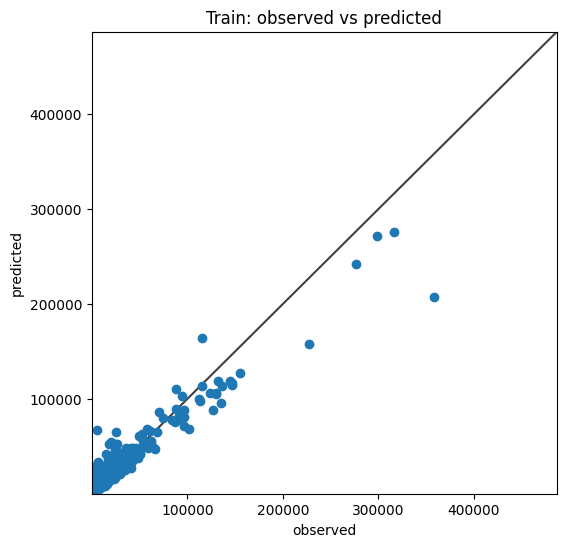

In [52]:
# pred vs obs(Train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(y_train, y_pred_train, "o")

axis_max = np.max([np.max(y_test), np.max(y_pred_train)])
axis_min = np.min([np.min(y_test), np.min(y_pred_train)])
axis_lim = [axis_min*0.9, axis_max*1.1]

ax.plot(axis_lim, axis_lim, "k-", alpha=0.75, zorder=0)
ax.set_xlim(axis_lim)
ax.set_ylim(axis_lim)
ax.set_xlabel("observed")
ax.set_ylabel("predicted")
ax.set_title("Train: observed vs predicted")
plt.show()

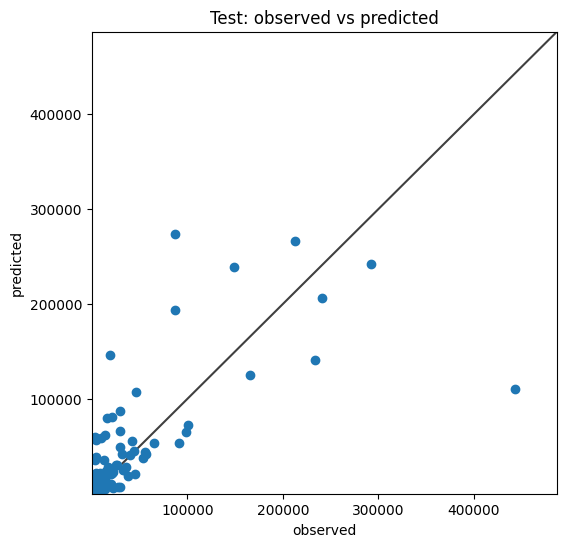

In [53]:
# pred vs obs(Test)
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(y_test, y_pred_test, "o")
# plot y=x
axis_max = np.max([np.max(y_test), np.max(y_pred_test)])
axis_min = np.min([np.min(y_test), np.min(y_pred_test)])
axis_lim = [axis_min*0.9, axis_max*1.1]

ax.plot(axis_lim, axis_lim, "k-", alpha=0.75, zorder=0)
ax.set_xlabel("observed")
ax.set_ylabel("predicted")
ax.set_xlim(axis_lim)
ax.set_ylim(axis_lim)
ax.set_title("Test: observed vs predicted")
plt.show()

In [6]:
import pandera as pa
from pandera.typing import Series

class WordEmbeddingSchema(pa.DataFrameModel):
    # 300次元の各ベクトルに対して動的にフィールドを生成
    for i in range(300):
        locals()[f"embedding_{i}"] = pa.Field()

In [7]:
# データフレームの例
import pandas as pd
import numpy as np

# 仮の300次元ベクトルデータを生成
data = np.random.rand(10, 300)
columns = [f"embedding_{i}" for i in range(300)]
df = pd.DataFrame(data, columns=columns)

# スキーマを用いたバリデーション
schema = WordEmbeddingSchema()
validated_df = schema.validate(df)

TypeError: DataFrameModel.validate() missing 1 required positional argument: 'check_obj'